In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [135]:
data=pd.read_csv("Housing.csv")

In [136]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [138]:
data.dropna(inplace=True)

In [139]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
Y=data['median_house_value']

In [140]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [141]:
train_data=X_train.join(Y_train)

In [142]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
711,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,NEAR BAY,184100.0
2837,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,INLAND,79400.0
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,INLAND,107200.0
3435,-118.42,34.26,26.0,1788.0,521.0,2582.0,484.0,2.1062,<1H OCEAN,136400.0
1305,-121.83,38.00,25.0,1710.0,288.0,799.0,259.0,4.8359,INLAND,145300.0
...,...,...,...,...,...,...,...,...,...,...
6657,-118.12,34.15,19.0,557.0,216.0,673.0,212.0,2.1763,<1H OCEAN,168800.0
16466,-121.29,38.10,14.0,1551.0,297.0,785.0,281.0,3.7750,INLAND,163300.0
6288,-117.90,34.05,33.0,629.0,76.0,253.0,75.0,7.6286,<1H OCEAN,330400.0
4251,-118.36,34.10,52.0,1295.0,281.0,578.0,273.0,2.9760,<1H OCEAN,405100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

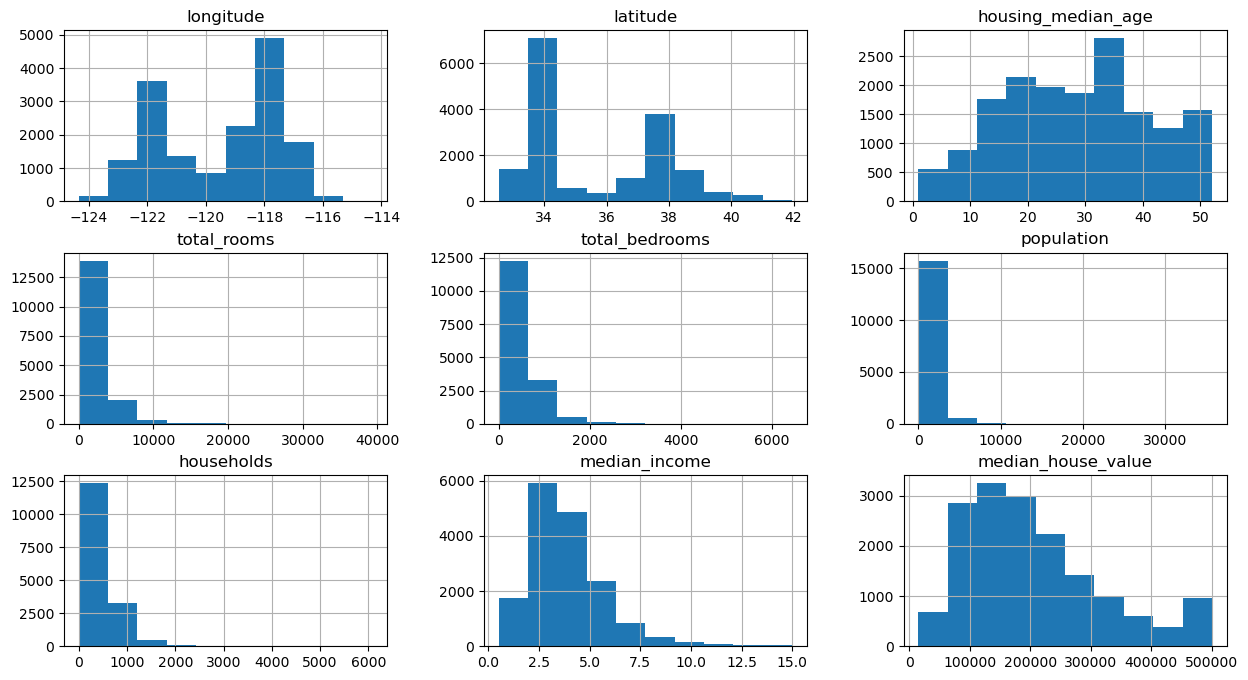

In [143]:
train_data.hist(figsize=(15,8))

<Axes: >

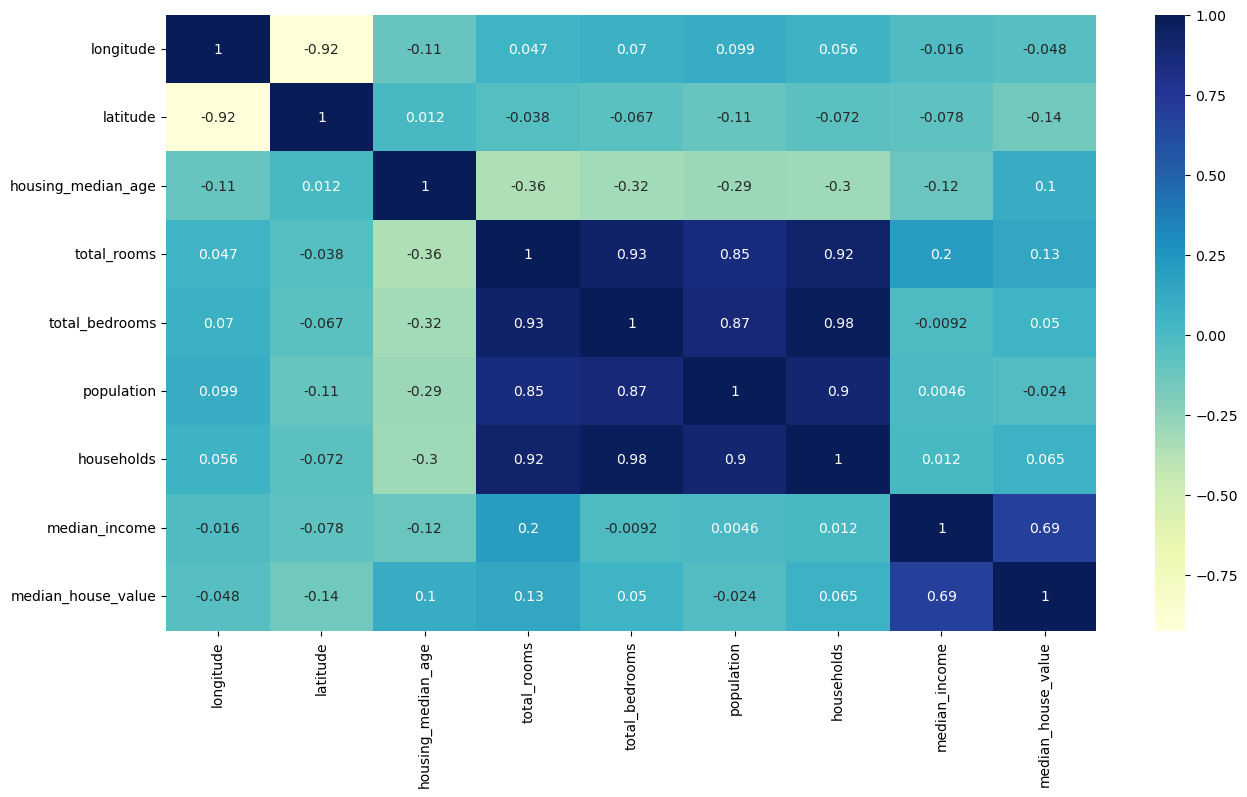

In [144]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [145]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

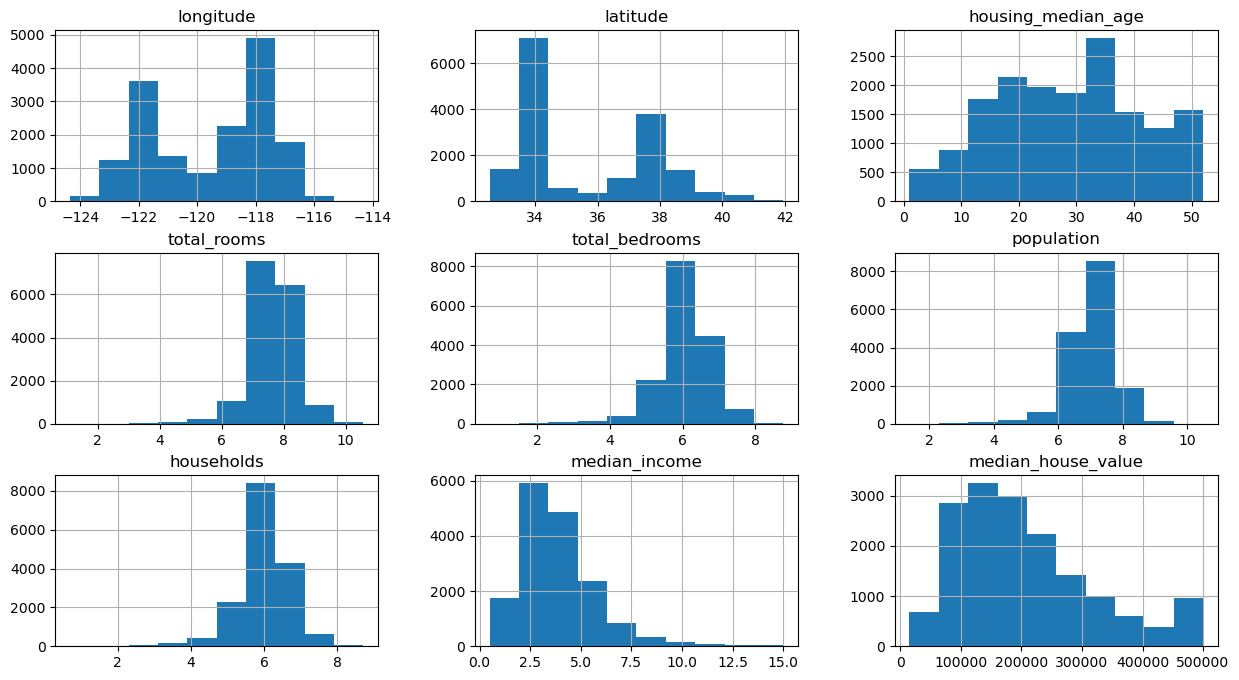

In [146]:
train_data.hist(figsize=(15,8))

In [147]:
train_data = train_data.drop('ocean_proximity', axis=1).join(pd.get_dummies(data['ocean_proximity'], dtype=int)) 


<Axes: >

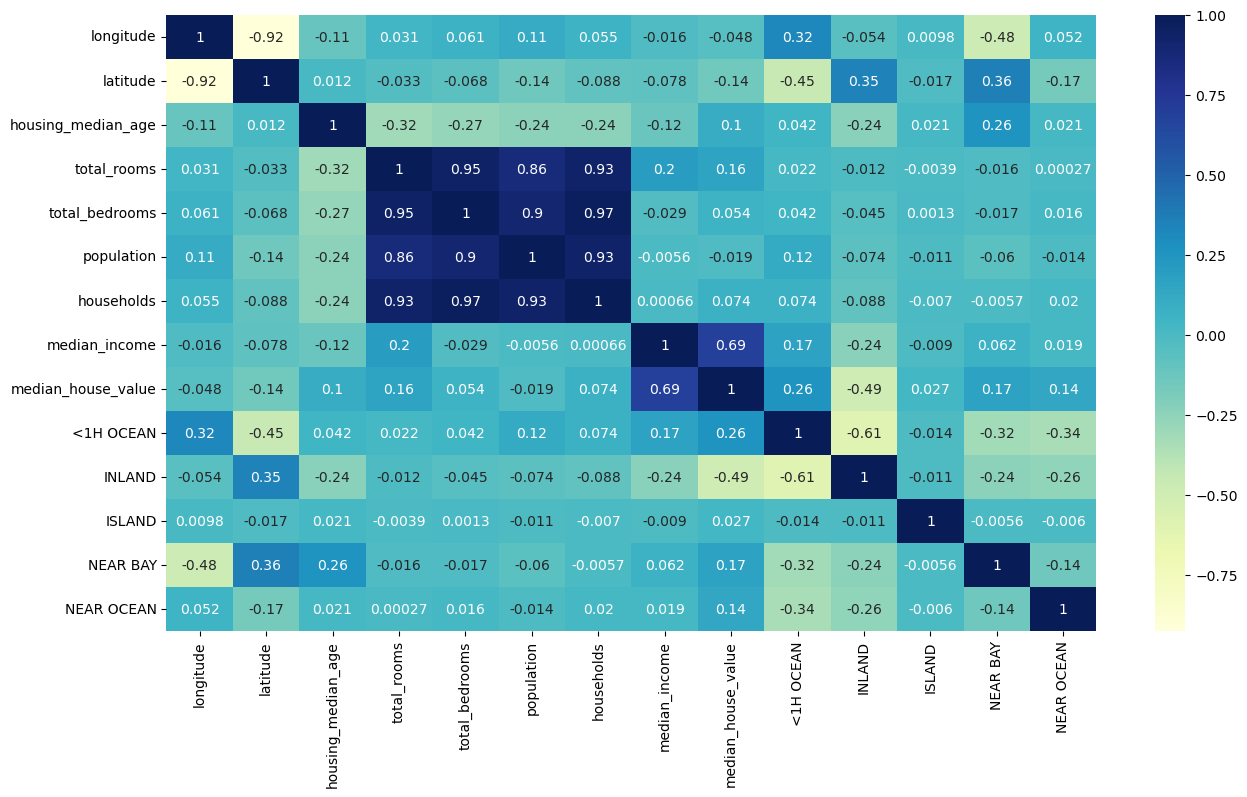

In [148]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

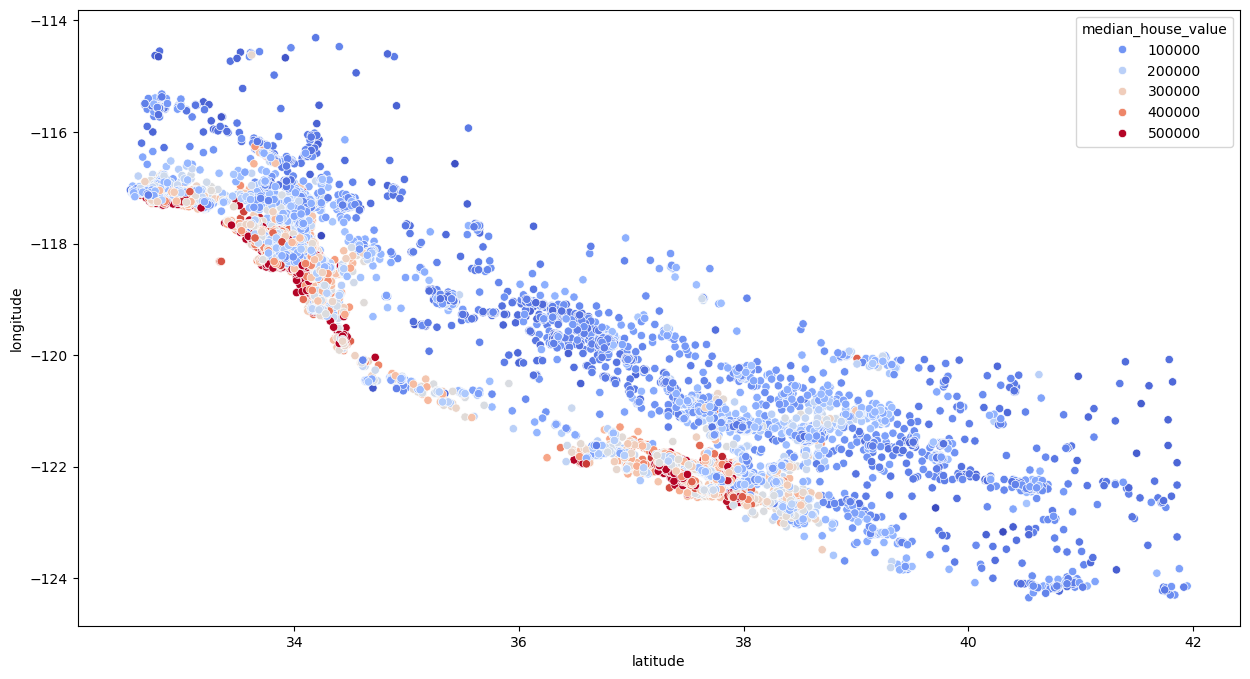

In [149]:
 plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [150]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

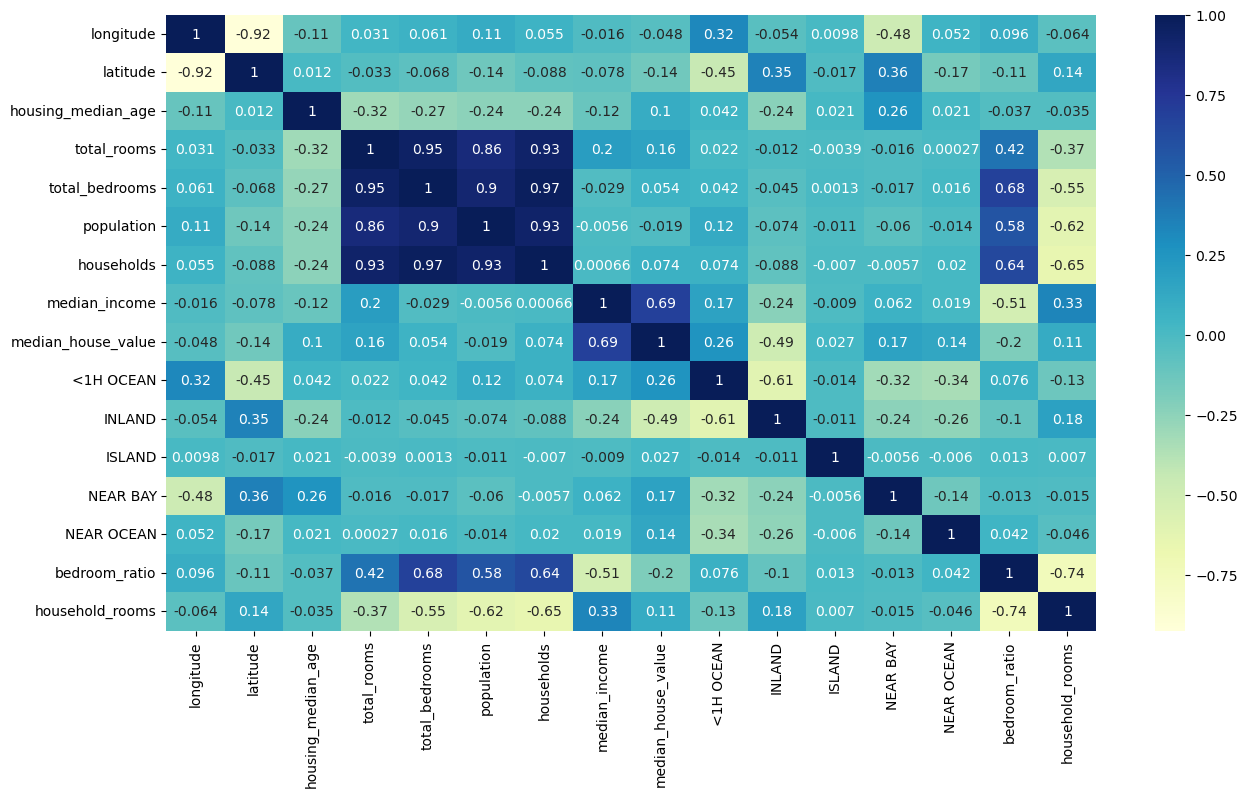

In [151]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train, Y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_s=scaler.fit_transform(X_train)

reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [153]:
test_data=X_test.join(Y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data = test_data.drop('ocean_proximity', axis=1).join(pd.get_dummies(data['ocean_proximity'], dtype=int)) 

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']



In [154]:
X_test, Y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [155]:
X_test_s=scaler.transform(X_test)

In [156]:
reg.score(X_test,Y_test)

0.6821167931654477

In [157]:
from sklearn.ensemble import RandomForestRegressor

forest= RandomForestRegressor()
forest.fit(X_train,Y_train)

RandomForestRegressor()

In [161]:
forest.score(X_test,Y_test)

0.8252073882821704